# Questão 4

Considere  o  problema  da  clusterização  dos  país  com  base  na  tabela  de índices  de  desenvolvimento de países (Fonte ONU- 2002, Livro – Análise de dados através de métodos 
de estatística multivariada  – Sueli A. Mingoti). Para  o  processo de identificação de aglomerados (“clusters”) considere  um  método  de  clusterização  hierárquica,  o  K-means  e  o SOM. Compare as três soluções.

In [27]:
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering
from minisom import MiniSom

from sklearn.preprocessing import MinMaxScaler

# Load dos dados
data = pd.read_csv('data/indice_de_desenvolvimento_dos_paises.csv')

X = data[['Expectativa_de_Vida', 'Educação', 'PIB', 'Estabilidade_Política']].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
# Kmeans
K = 3
kmeans = KMeans(n_clusters=K, random_state=42)

data['clusters_kmeans'] = kmeans.fit_predict(X_scaled)

for cluster_id in range(K):
    print(f'\n==== CLUSTER {cluster_id} ====')
    df_filtrado = data[data['clusters_kmeans'] == cluster_id]
    paises = df_filtrado['País'].to_list()

    print(f'Paises: {paises}\n')
    print(df_filtrado[['Expectativa_de_Vida', 'Educação', 'PIB', 'Estabilidade_Política']].mean())


==== CLUSTER 0 ====
Paises: ['Argentina', 'Uruguai', 'Cuba', 'Colômbia', 'Brasil', 'Paraguai', 'Egito']

Expectativa_de_Vida      0.771429
Educação                 0.791429
PIB                      0.637143
Estabilidade_Política    0.497143
dtype: float64

==== CLUSTER 1 ====
Paises: ['Nigéria', 'Senegal', 'Serra Leoa', 'Angola', 'Etiópia', 'Moçambique']

Expectativa_de_Vida      0.338333
Educação                 0.393333
PIB                      0.353333
Estabilidade_Política   -1.763333
dtype: float64

==== CLUSTER 2 ====
Paises: ['Reino Unido', 'Austrália', 'Canadá', 'Estados Unidos', 'Japão', 'França', 'Cingapura', 'China']

Expectativa_de_Vida      0.88125
Educação                 0.96125
PIB                      0.91000
Estabilidade_Política    1.19000
dtype: float64


In [29]:
# Clusterização Hierárquica (AgglomerativeClustering)
agg_clustering = AgglomerativeClustering(n_clusters=K)

data['clusters_hierarquica'] = agg_clustering.fit_predict(X_scaled)

for cluster_id in range(K):
    print(f'\n==== CLUSTER {cluster_id} ====')
    df_filtrado = data[data['clusters_hierarquica'] == cluster_id]
    paises = df_filtrado['País'].to_list()

    print(f'Paises: {paises}\n')
    print(df_filtrado[['Expectativa_de_Vida', 'Educação', 'PIB', 'Estabilidade_Política']].mean())


==== CLUSTER 0 ====
Paises: ['Nigéria', 'Senegal', 'Serra Leoa', 'Angola', 'Etiópia', 'Moçambique']

Expectativa_de_Vida      0.338333
Educação                 0.393333
PIB                      0.353333
Estabilidade_Política   -1.763333
dtype: float64

==== CLUSTER 1 ====
Paises: ['Argentina', 'Uruguai', 'Cuba', 'Colômbia', 'Brasil', 'Paraguai', 'Egito']

Expectativa_de_Vida      0.771429
Educação                 0.791429
PIB                      0.637143
Estabilidade_Política    0.497143
dtype: float64

==== CLUSTER 2 ====
Paises: ['Reino Unido', 'Austrália', 'Canadá', 'Estados Unidos', 'Japão', 'França', 'Cingapura', 'China']

Expectativa_de_Vida      0.88125
Educação                 0.96125
PIB                      0.91000
Estabilidade_Política    1.19000
dtype: float64


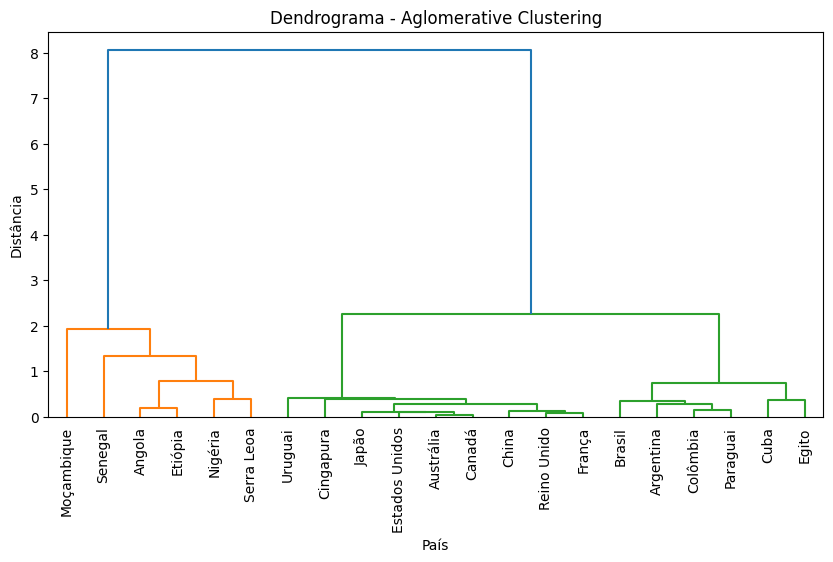

In [32]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# linkage pode ser: 'ward', 'average', 'complete', 'single'
Z = linkage(X, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(Z, labels=data['País'].tolist(), leaf_rotation=90)
plt.title("Dendrograma - Aglomerative Clustering")
plt.xlabel("País")
plt.ylabel("Distância")
plt.show()


In [44]:
# SOM
from minisom import MiniSom
import numpy as np

som_x = 10
som_y = 10

som = MiniSom(x=som_x, y=som_y, input_len=X_scaled.shape[1], sigma=1.5, learning_rate=.5,
              neighborhood_function='gaussian')

som.random_weights_init(X_scaled)
som.train_random(X_scaled, 500)

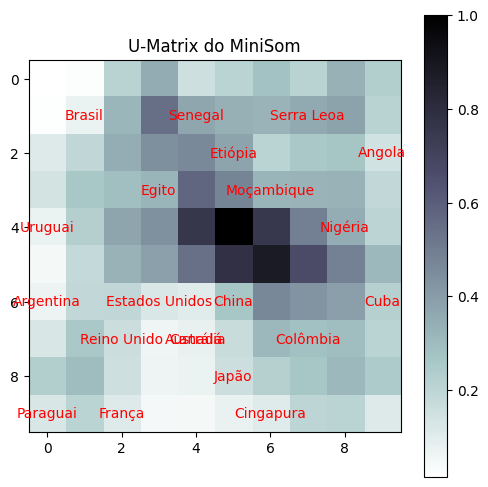

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
u_matrix = som.distance_map()

plt.imshow(u_matrix, cmap='bone_r')
plt.colorbar()

# plotar os países nos neurônios
for i, x in enumerate(X_scaled):
    w = som.winner(x)
    plt.text(w[1], w[0], data['País'][i],
             ha='center', va='center', color='red')

plt.title("U-Matrix do MiniSom")
plt.show()